In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition shock, and linear
    distribution behind
     
    Parameters
    ----------
    nx         : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight
        
    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """
    rho = np.arange(nx)*2./nx*rho_light     # Before stoplight
    rho[(nx-1)/2:] = 0
    
    return rho

In [5]:
#Basic initial condition parameters
#defining grid size, time steps
nx = 81
nt = 30
dx = 4.0/(nx-1)



x = np.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10
rho = rho_green_light(nx, rho_light)

C:\Users\Amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


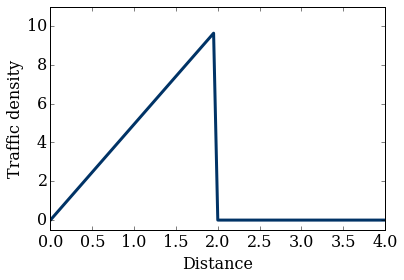

In [6]:
plt.plot(x, rho, color='#003366', ls='-', lw=3)
plt.ylabel('Traffic density')
plt.xlabel('Distance')
plt.ylim(-0.5,11.);

# Traffic Flux

In [7]:
def computeF(u_max, rho_max, rho):
    """Computes fluc F=V*rho
    
    Parameters
    ----------
    u_max : float
        Maximum allowed velocity
    rho    : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
        
    Returns
    -------
    F : array
        Array with flux at every point x
    """
    return u_max*rho*(1-rho/rho_max)

# Forward-time/backward-space discretization

In [8]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with  forward in time, backward in space
    
    Parameters
    ----------
    rho      : array of floats
                Density at current time-step
    nt       : int
               Number of time steps
    dt       : float
              Time-step size
    dx       : float
              Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
            
    Returns
    -------
    rho_n : array of floats
            Desnity after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = np.zeros((nt,len(rho)))
    #copy the inital u array into each row of our new array
    rho_n[0,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n
    

In [9]:
sigma = 1
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

In [10]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


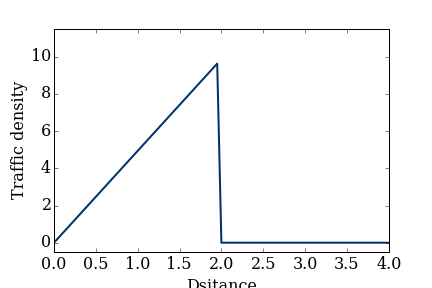
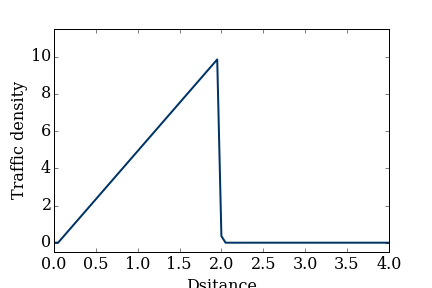
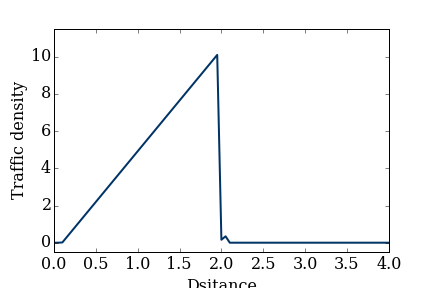
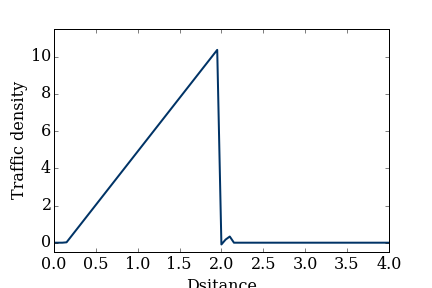
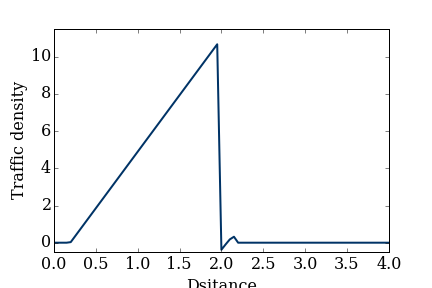
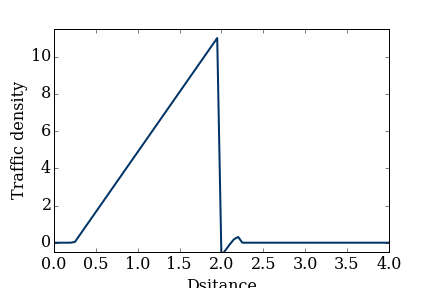
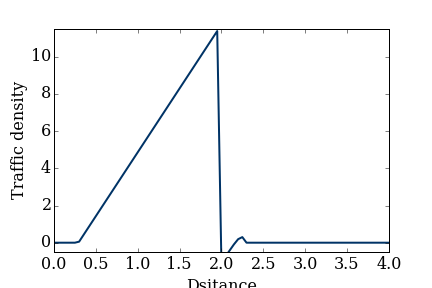
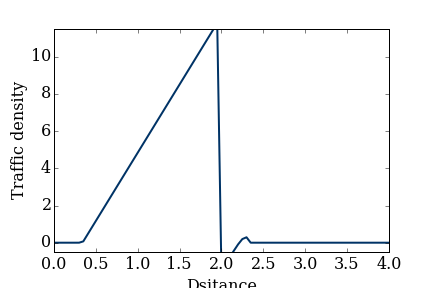
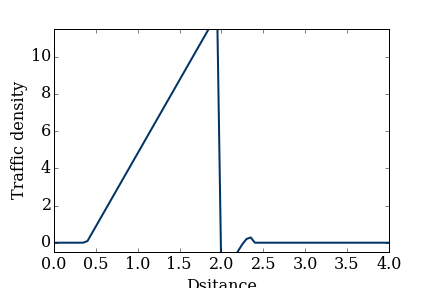
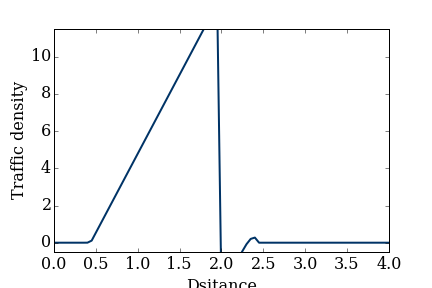
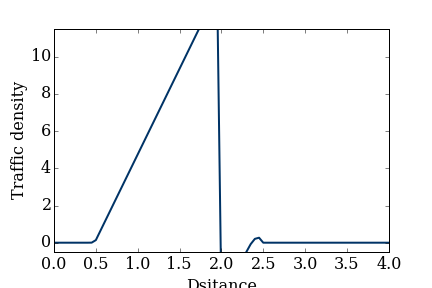
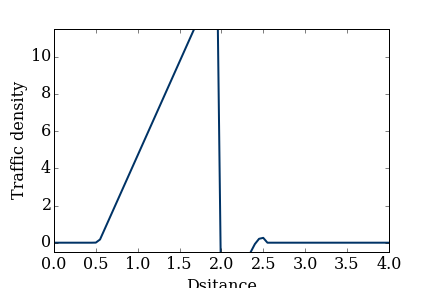
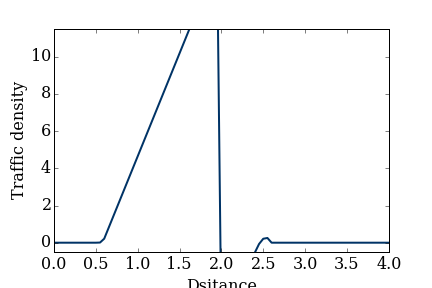
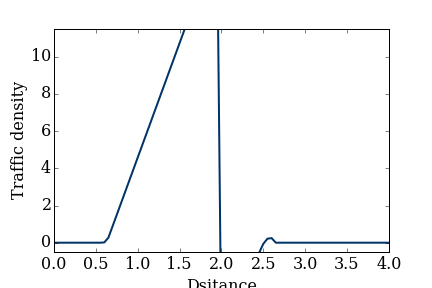
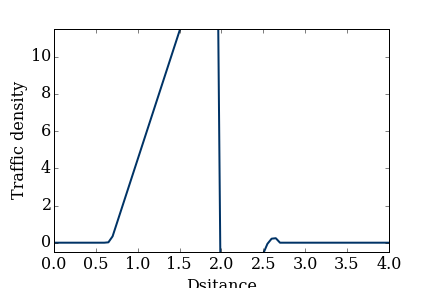
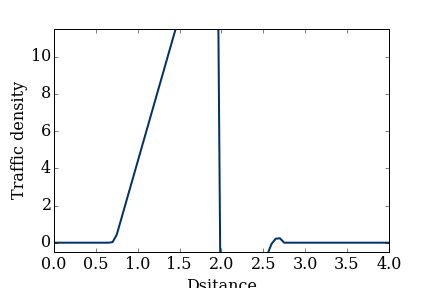
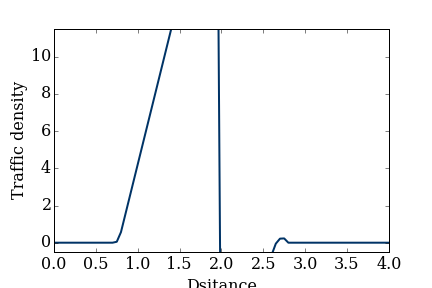
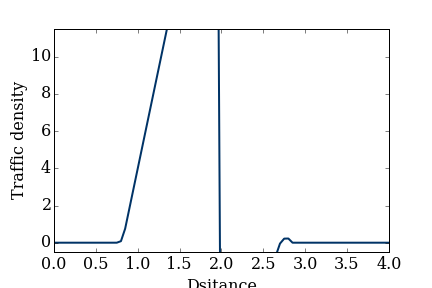
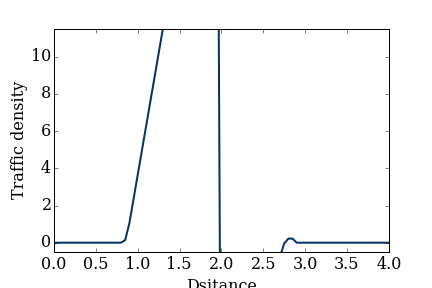
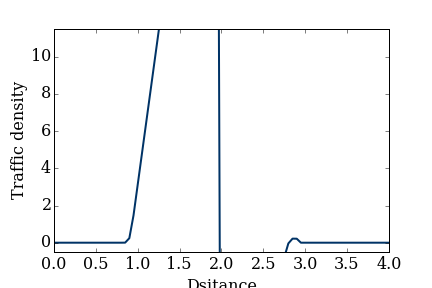
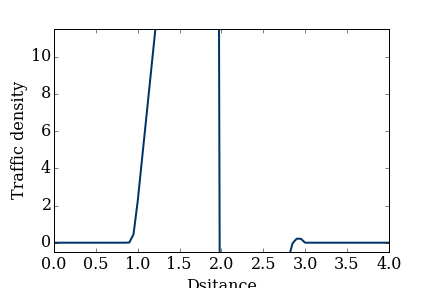
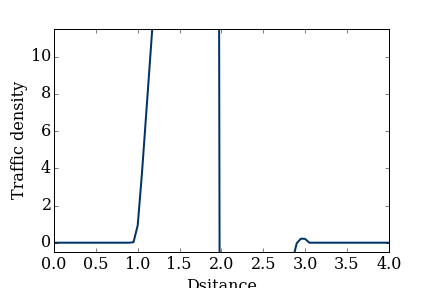
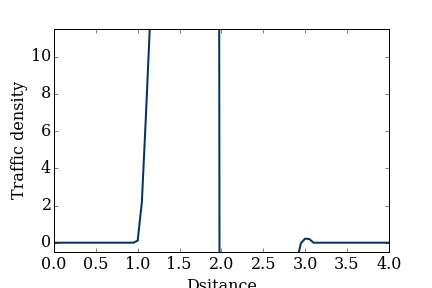
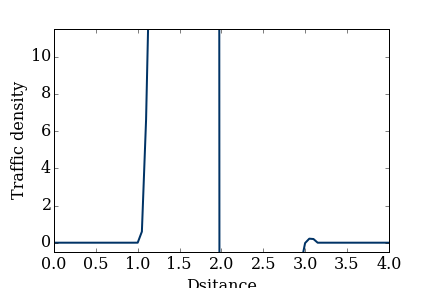
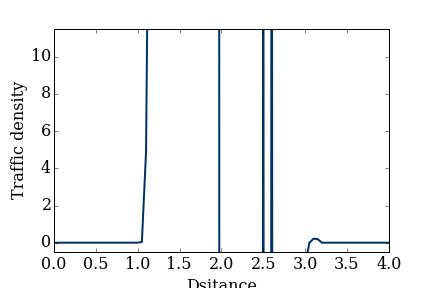
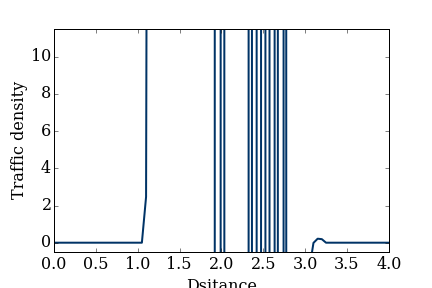
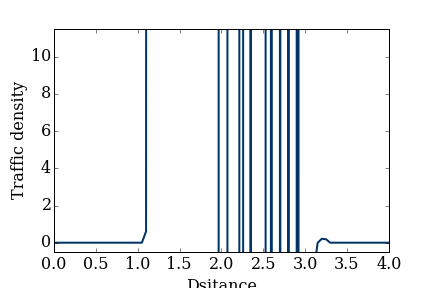
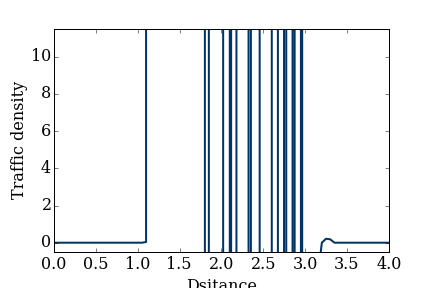
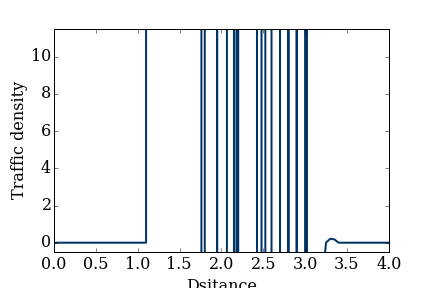
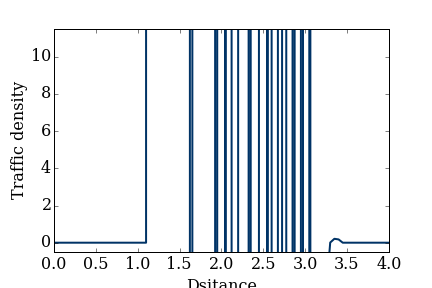

In [11]:
fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Dsitance'),\
             ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = np.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n,\
                              interval=50)
display_animation(anim, default_mode='once')

Backward-space scheme unstable for negative values of wave speed

# Upwind Schemes

Discretization schemes that are biased in the direction that 
information propagates are called Upwind Schemes

 - Setting an inital condition that does not produce negative values of density propagation

C:\Users\Amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



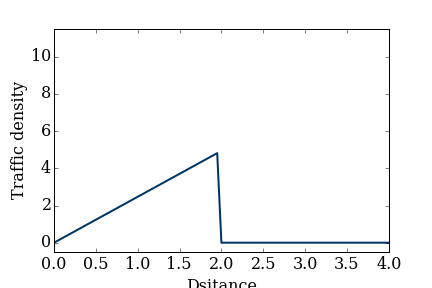
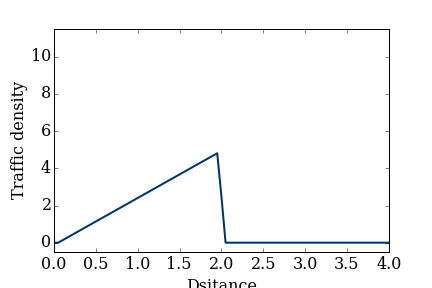
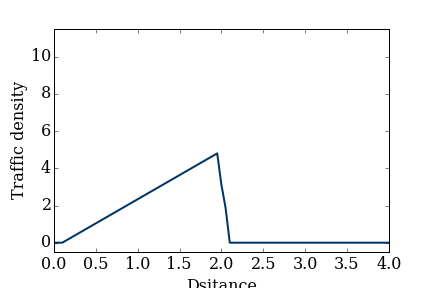
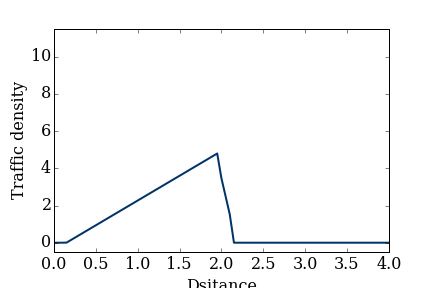
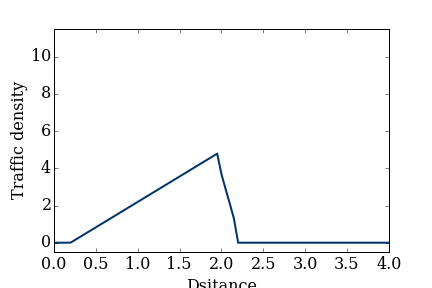
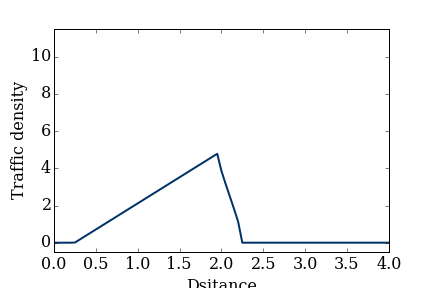
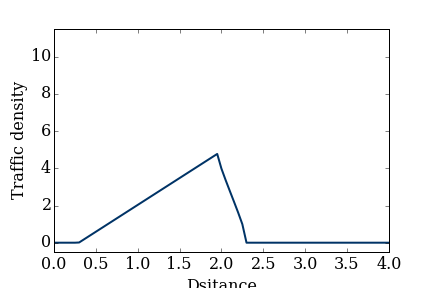
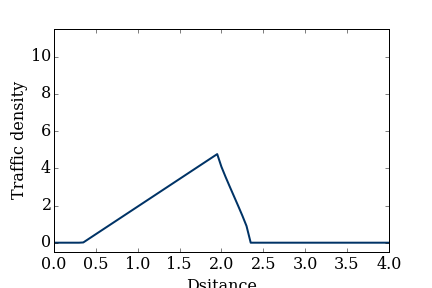
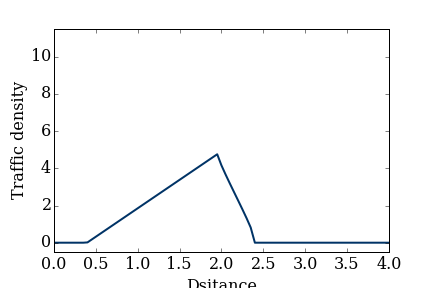
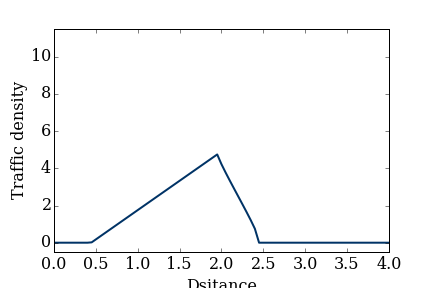
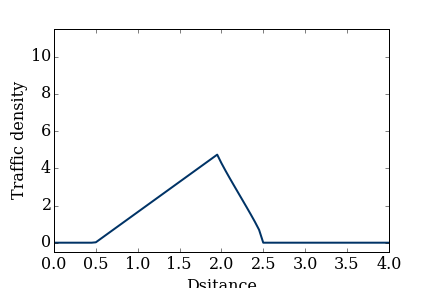
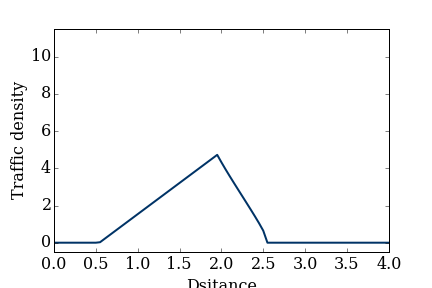
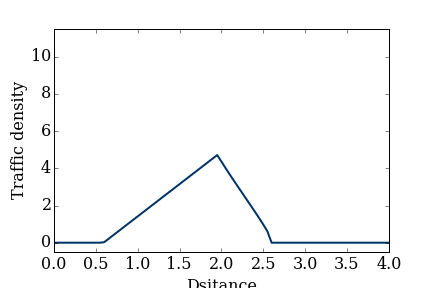
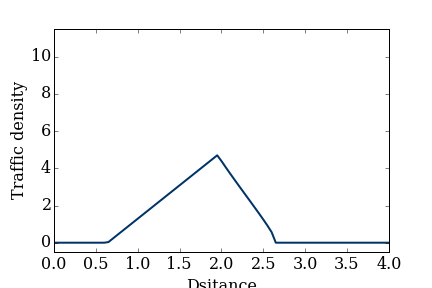
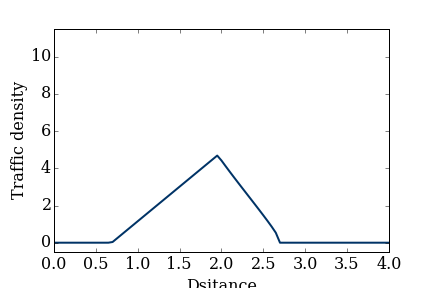
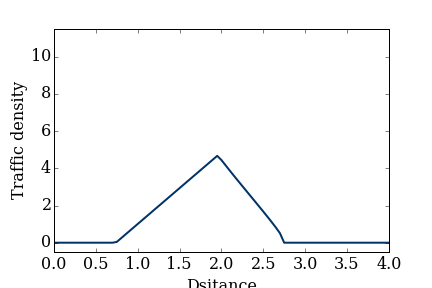
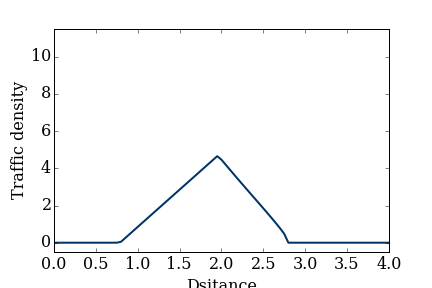
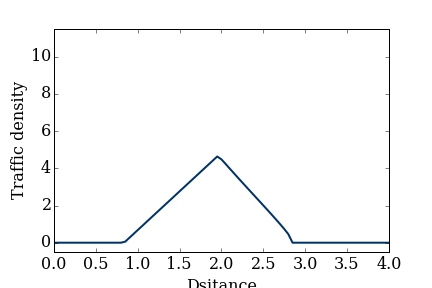
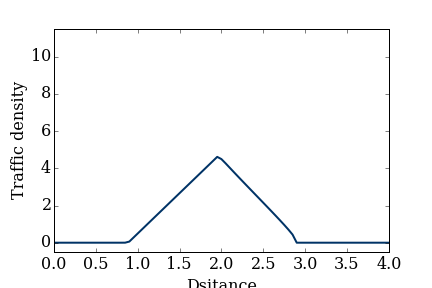
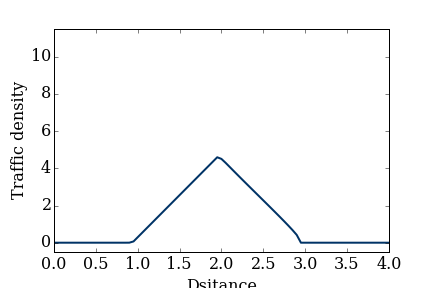
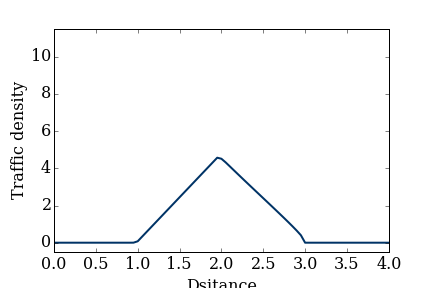
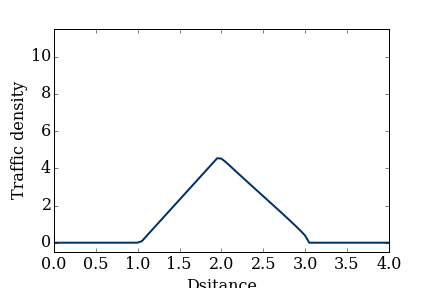
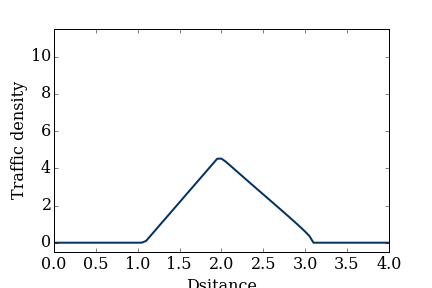
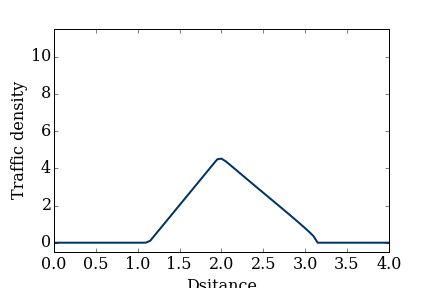
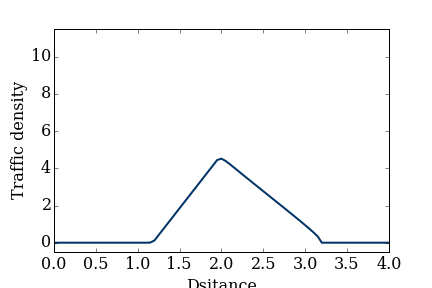
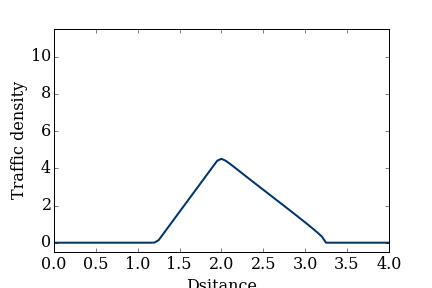
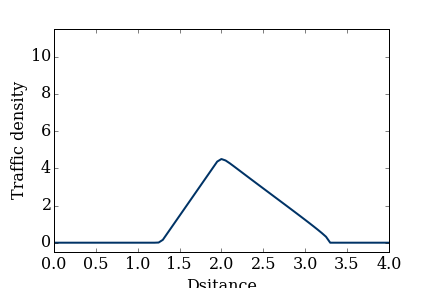
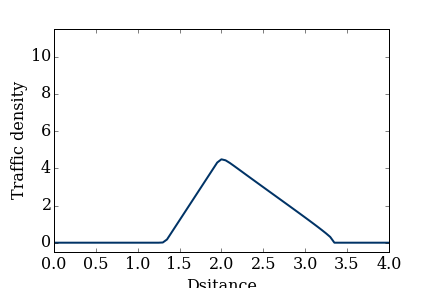
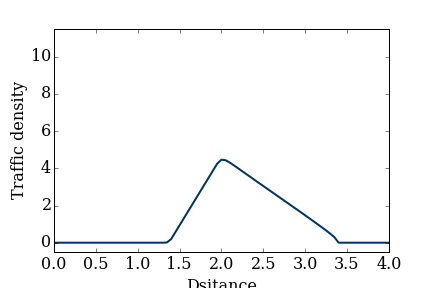
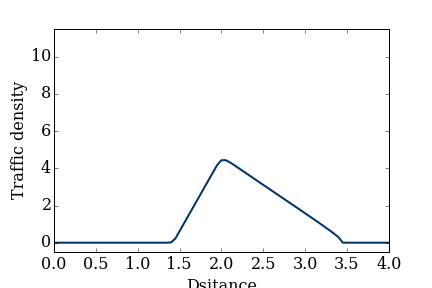
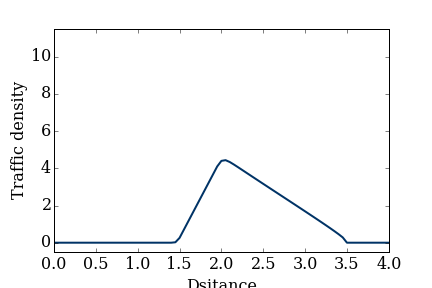
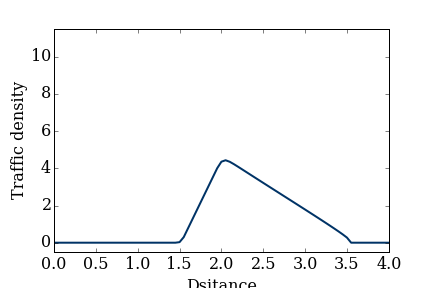
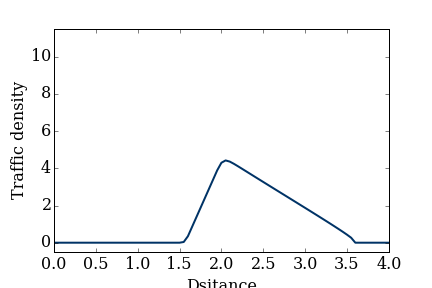
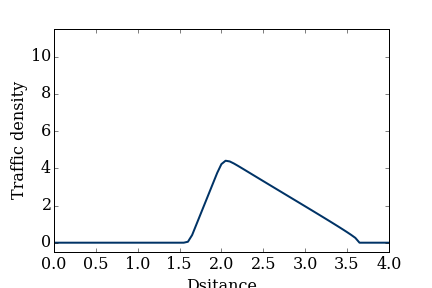
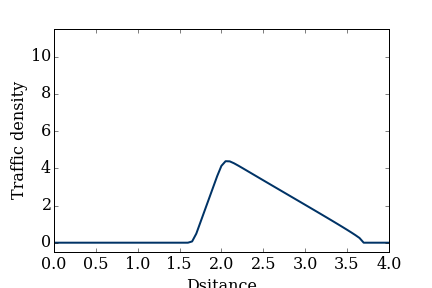
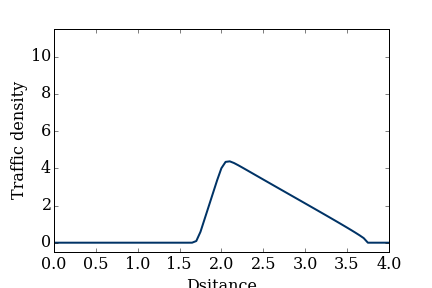
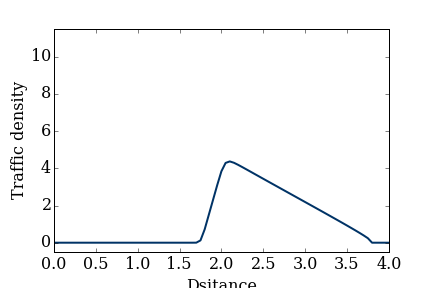
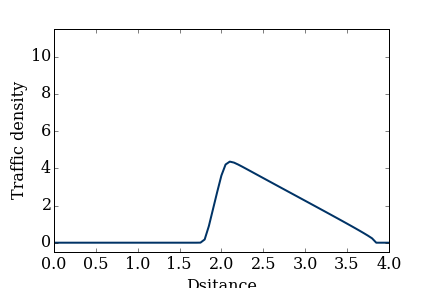
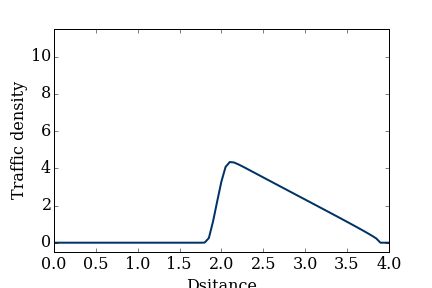
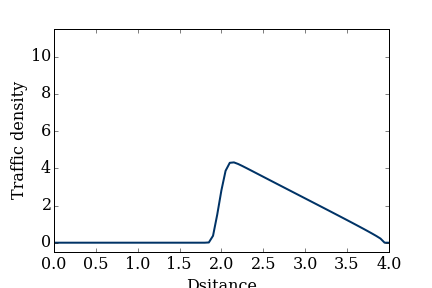

In [14]:
rho_light = 5
nt = 40
rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim  = animation.FuncAnimation(fig, animate, frames=rho_n,\
                               interval=50)
display_animation(anim, default_mode='once')

# CFL

C:\Users\Amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



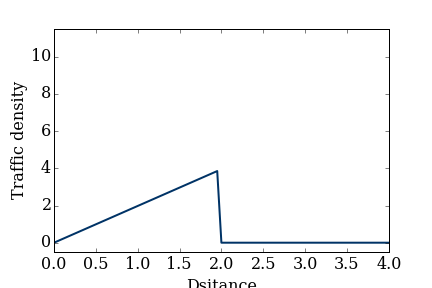
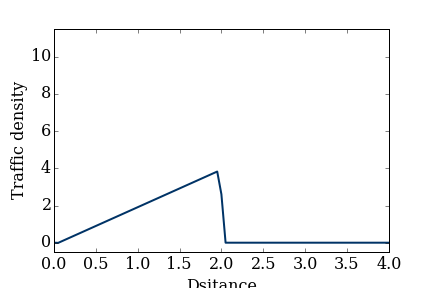
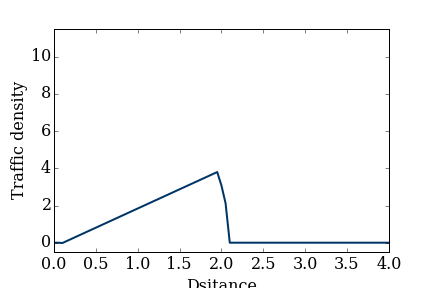
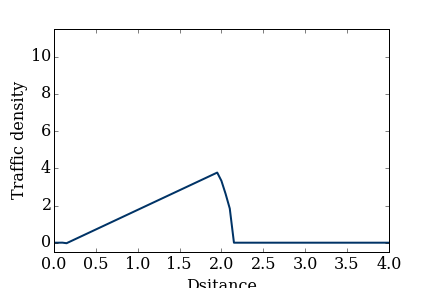
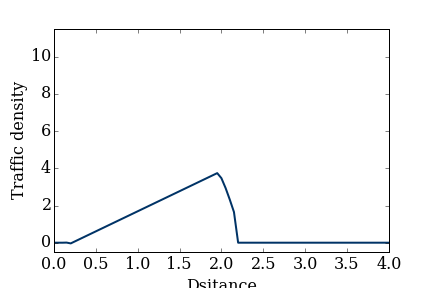
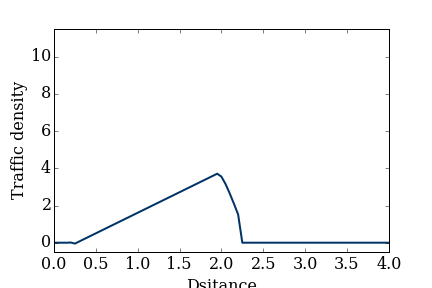
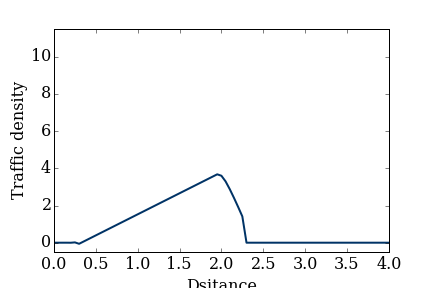
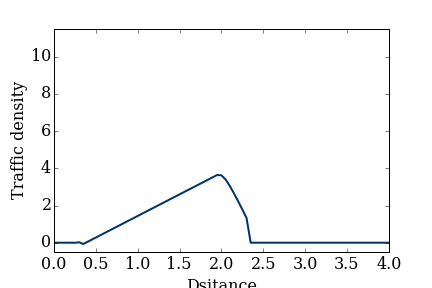
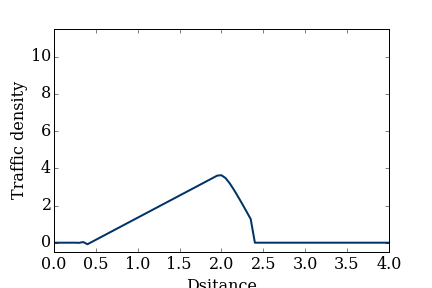
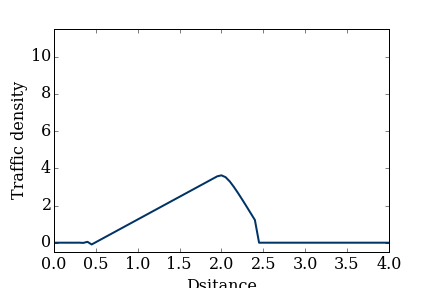
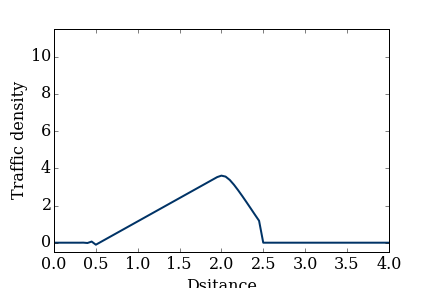
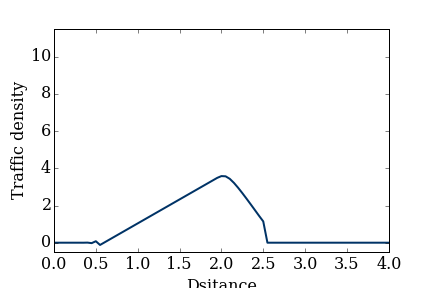
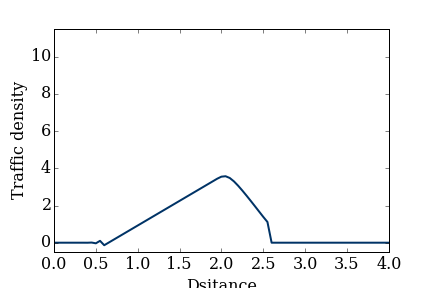
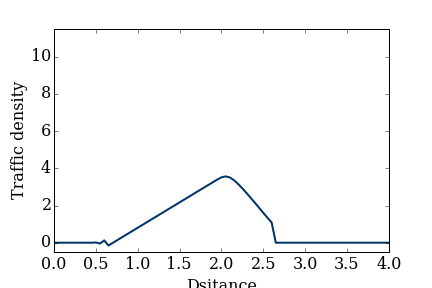
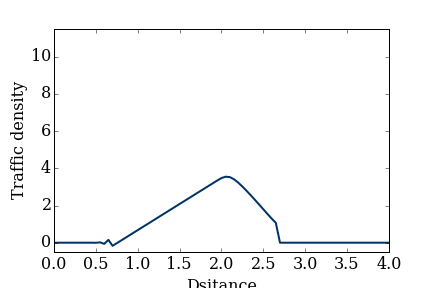
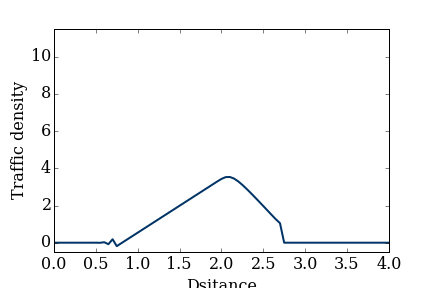
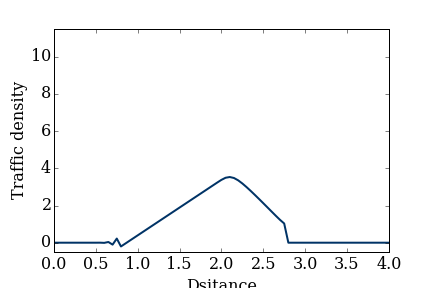
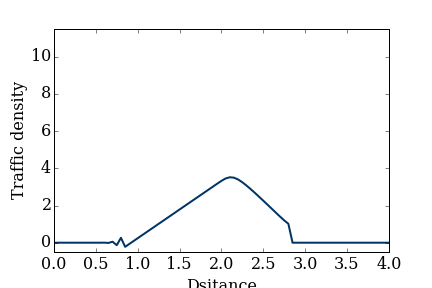
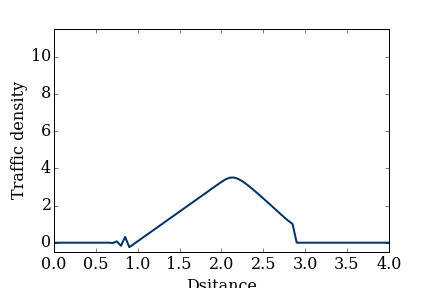
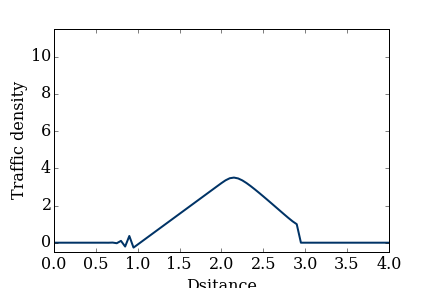
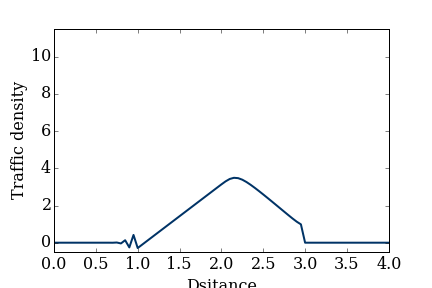
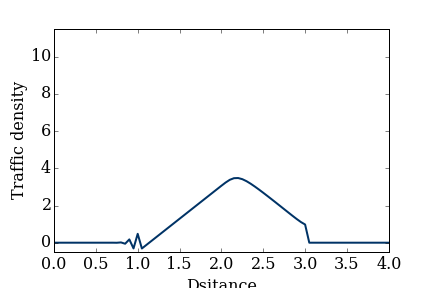
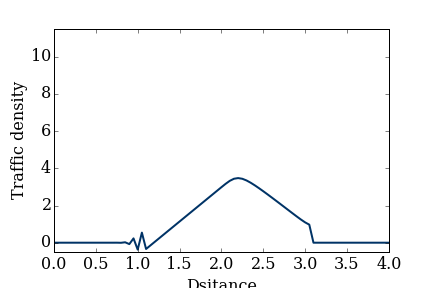
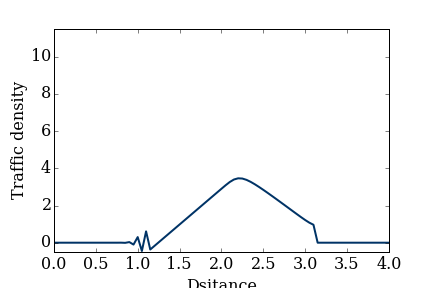
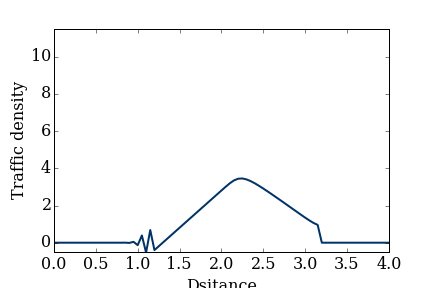
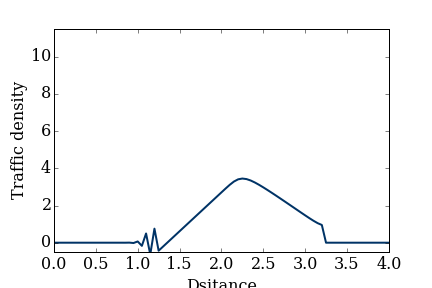
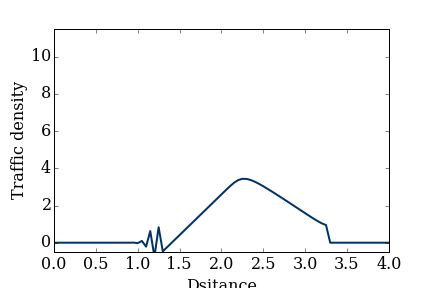
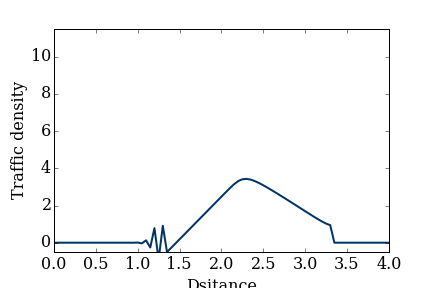
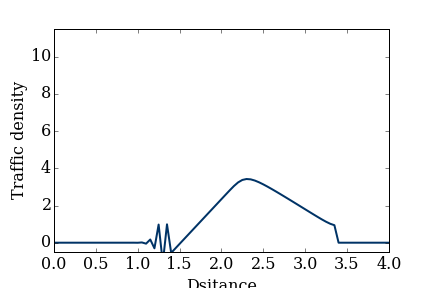
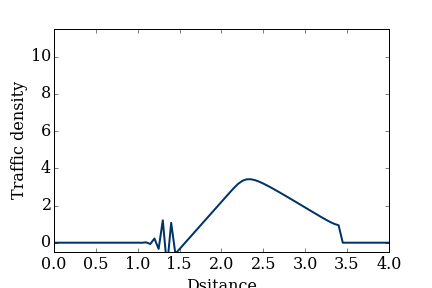
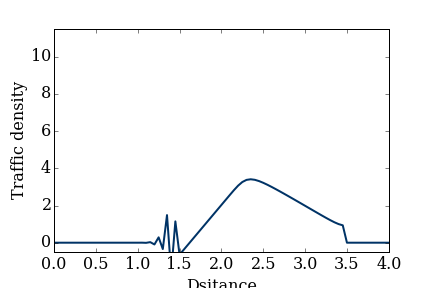
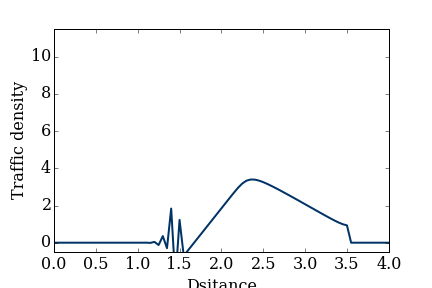
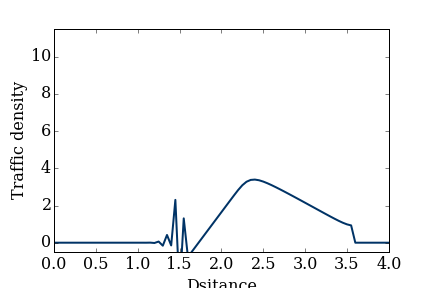
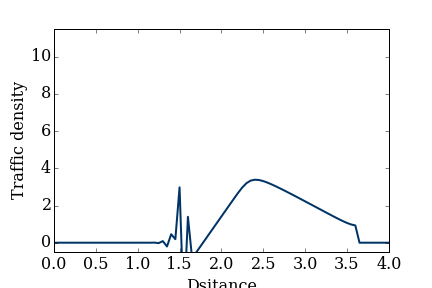
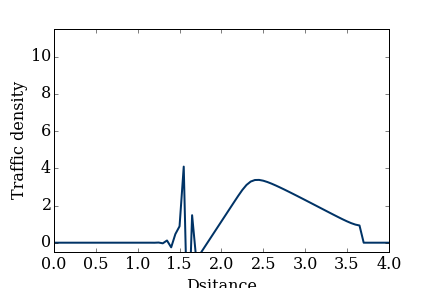
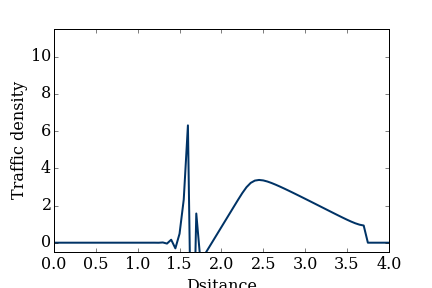
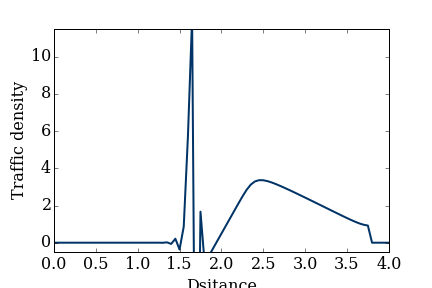
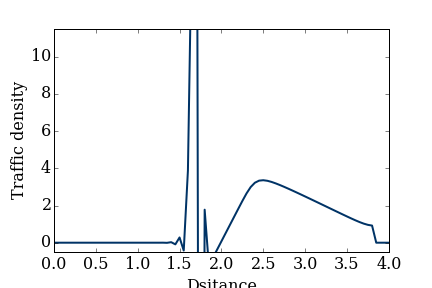
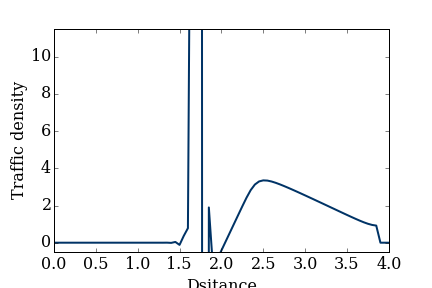
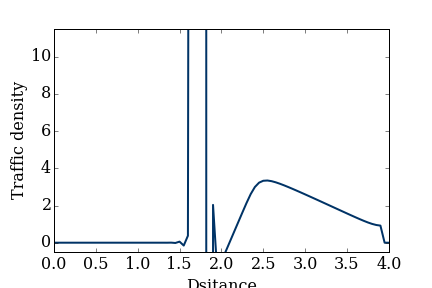

In [18]:
rho_light = 4
u_max = 1.1
nt = 40
rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n,\
                              interval=50)
display_animation(anim, default_mode='once')